In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

transaction_file_path = "transaction_data.csv"
purchase_file_path = "purchase_behaviour.csv"

transaction_data = pd.read_csv(transaction_file_path)
purchase_data = pd.read_csv(purchase_file_path)

print(transaction_data.shape)
print(purchase_data.shape)

(264836, 8)
(72637, 3)


In [26]:
transaction_data.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [27]:
purchase_data.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [28]:
transaction_data['LYLTY_CARD_NBR'].nunique()

72637

In [31]:
purchase_data['PREMIUM_CUSTOMER'].nunique()

3

In [30]:
purchase_data['LYLTY_CARD_NBR'].nunique()

72637

In [32]:
merged_data = transaction_data.merge(purchase_data, on="LYLTY_CARD_NBR", how="left")

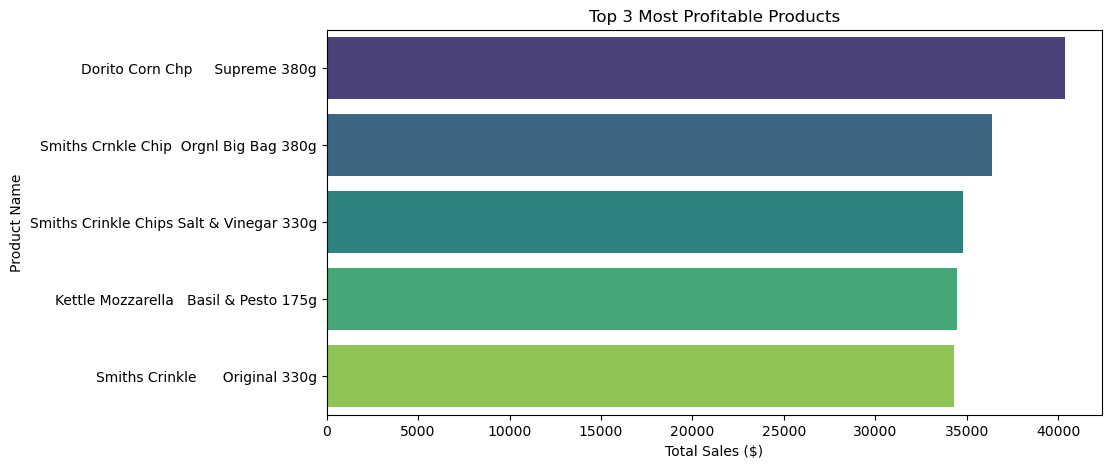

In [34]:
top_products = (
    transaction_data.groupby(["PROD_NBR", "PROD_NAME"])["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)
    .head(5)
)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_products["TOT_SALES"],
    y=top_products["PROD_NAME"],
    palette="viridis")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Name")
plt.title("Top 3 Most Profitable Products")
plt.show()

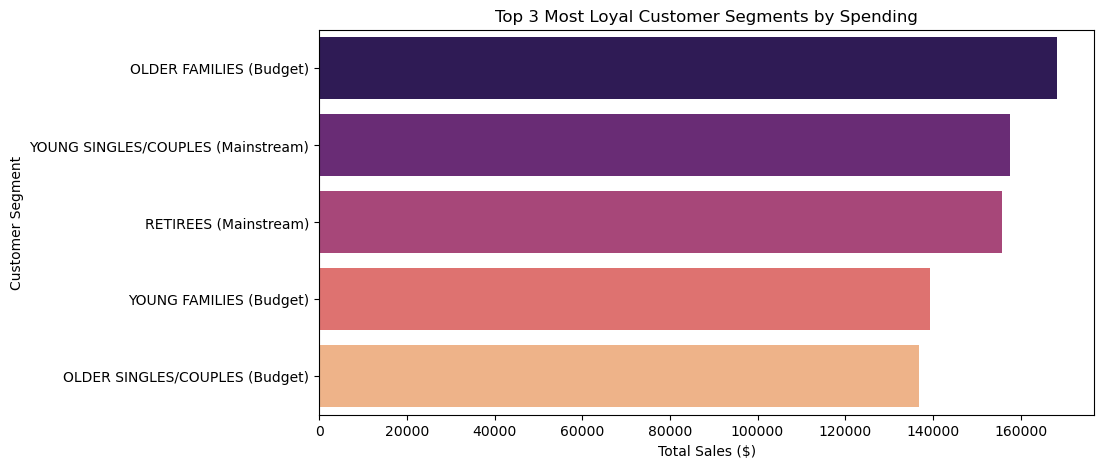

In [36]:
loyal_customers = (
    merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)
    .head(5)
)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=loyal_customers["TOT_SALES"],
    y=loyal_customers["LIFESTAGE"] + " (" + loyal_customers["PREMIUM_CUSTOMER"] + ")",
    palette="magma")
plt.xlabel("Total Sales ($)")
plt.ylabel("Customer Segment")
plt.title("Top 3 Most Loyal Customer Segments by Spending")
plt.show()
